![](https://i.imgur.com/0AUxkXt.png)

# SF Salaries Exercise 

Explore San Francisco city employee salary data.

## Overview

One way to understand how a city government works is by looking at who it employs and how its employees are compensated. This data contains the names, job title, and compensation for San Francisco city employees on an annual basis from 2011 to 2014.



Just follow along and complete the tasks outlined in bold below. The tasks will get harder and harder as you go along.

## Resourses

[Pandas API Reference](https://pandas.pydata.org/pandas-docs/stable/api.html)

[NumPy Reference](https://docs.scipy.org/doc/numpy/reference/)

[Visualization with Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)


**Import libraries**

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import random as random
import numpy as num

**Read `Salaries.csv` as a dataframe called `sal`.**

In [4]:
# link = "https://s3-ap-southeast-1.amazonaws.com/intro-to-ml-minhdh/Salaries.csv"
sal = pd.read_csv("https://s3-ap-southeast-1.amazonaws.com/intro-to-ml-minhdh/Salaries.csv")

**Check the head of the DataFrame.**

In [5]:
#Print 3 head of the DataFrame
sal.head(3)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN


**Use the .info() method to find out how many entries there are.**

In [7]:
#Print info summary of the data
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              0 non-null float64
dtypes: float64(8), int64(2), object(3)
memory usage: 13.0+ MB


**What is the average BasePay ?**

Keyword: [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html)

In [9]:
#Print avaerage BasePay by using mean
sal['BasePay'].mean()

66325.4488404877

**What is the lowest and highest amount of BasePay?**

Keyword: 
[min](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.min.html) , 
[max](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.max.html)

In [10]:
#Show the lowest of BasePay
sal['BasePay'].min()

-166.01

In [11]:
#Show the highest of BasePay
sal['BasePay'].max()

319275.01

**How about OvertimePay in the dataset? What is the average, lowest, highest amount?**

In [14]:
#show the avaverage of OvertimePay
print('Average',sal['OvertimePay'].mean())
#show the lowest of OvertimePay
print('Min:',sal['OvertimePay'].min())
#show the highest of OvertimePay
print('Max:',sal['OvertimePay'].max())


Average 5066.059886444667
Min: -0.01
Max: 245131.88


**What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll).**

In [36]:
#Get information of Joseph Driscoll in EmployeeName column
getUser= sal[sal['EmployeeName']=="Joseph Driscoll"]
print(getUser['EmployeeName']+" is "+getUser['JobTitle'])

36198    Joseph Driscoll is Captain, Fire Suppression
dtype: object


In [24]:
# Now try to select Employees who have name "GARY JIMENEZ"
#Get information of GARY JIMENEZ in EmployeeName column
getUserGary=sal[sal['EmployeeName']=="GARY JIMENEZ"]
print(getUserGary['EmployeeName']+" is "+getUserGary['JobTitle'])

1    GARY JIMENEZ is CAPTAIN III (POLICE DEPARTMENT)
dtype: object


**How much does JOSEPH DRISCOLL make (including benefits)?**

In [43]:
#total pay,benefits which Joseph Driscoll make
print("Totalpay: ",getUser['TotalPay'])
print("Benefits: ",getUser['TotalPayBenefits'] - getUser['TotalPay'])

Totalpay:  36198    288915.63
Name: TotalPay, dtype: float64
Benefits:  36198    42919.16
dtype: float64


**What is the name of highest paid person (including benefits)?**

In [45]:
#Get highest person paid
getHighestPerson= sal[sal['TotalPayBenefits']==sal['TotalPayBenefits'].max()]
print('Name:',getHighestPerson['EmployeeName'])


Name: 0    NATHANIEL FORD
Name: EmployeeName, dtype: object


**What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [48]:
#Get lowest person paid
getLowestPerson= sal[sal['TotalPayBenefits']==sal['TotalPayBenefits'].min()]
print('Name:',getLowestPerson['EmployeeName'])
print('Totalpay:',getLowestPerson['TotalPayBenefits'])

Name: 148653    Joe Lopez
Name: EmployeeName, dtype: object
Totalpay: 148653   -618.13
Name: TotalPayBenefits, dtype: float64


**What was the average (mean) BasePay of all employees per year? (2011-2014) ?**
Keyword: _groupby_

In [61]:
#getBasePay Avg by using groupby with mean
getBasePay= sal.groupby('Year').mean()
getBasePay['BasePay']

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

**How many unique job titles are there?**

Keyword: _unique, nunique_

In [65]:
#get JobTitle by using unique with Job Title
getJobtitle= sal['JobTitle'].unique()
print(len(getJobtitle))

2159


**What are the top 5 most common jobs?**

Keyword: *value_counts*

In [69]:
#Get value of top 5 most common by using value_counts
jobs= sal['JobTitle'].value_counts()
jobs.head(5)

Transit Operator    7036
Special Nurse       4389
Registered Nurse    3736
Name: JobTitle, dtype: int64

**How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?)**

In [71]:
#get Year in 2013
getYear= sal[sal['Year']==2013]
#getJob in 2013 with groupby
getJob= getYear.groupby('JobTitle')
print(len(getJob))

1051


**How many people have the word Chief in their job title?**

In [90]:
#Set a cointain word
containWord="Chief"
#create count variable
count=0;
#getListJob
getListJob=sal['JobTitle']
#count person get Job with contain word by using loop
for x in list(range(0,len(sal))):
    if(containWord in getListJob[x]):
        count+=1
print(count)    

423


## Data Visualization

**Implement seaborn's countplot with x='Year'**

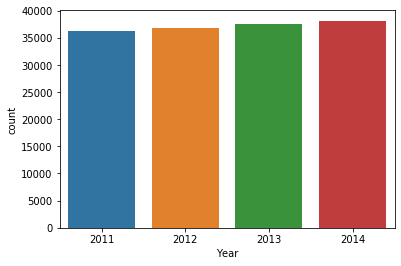

In [93]:
#Visualize # of salary, wih x = year
sb.countplot(x="Year",data=sal)

**Implement seaborn's distplot for BasePay of Year 2011**

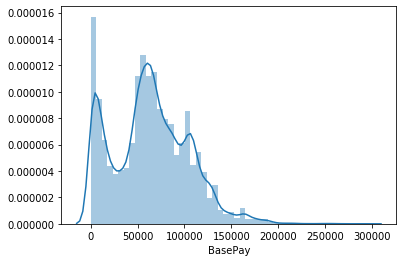

In [97]:
#Get info in 2011
getBasePay=sal[sal['Year']==2011]
#show with displot BasePay
sb.distplot(getBasePay['BasePay'])

**How about other Year**

ValueError: cannot convert float NaN to integer

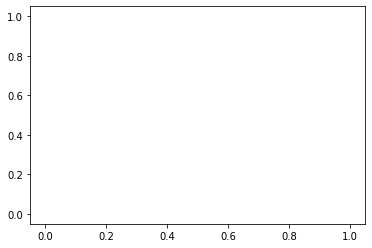

In [124]:
#Get info not in 2011
getBasePay1=sal[sal['Year']!=2011]
#show with displot BasePay
sb.distplot(getBasePay1['BasePay'])

## Bonus

**Visualize top 5 Jobs with BasePay, Benefits and OvertimePay**

Keyword: *index, isin, groupby, mean, plot*

In [186]:
groupbyJob= sal.groupby('JobTitle').sum()
groupBy= groupbyJob.sort_values(['BasePay','Benefits','OvertimePay'],ascending=False)
groupBy.plot(kind='bar',x="JobTitle",y="BasePay")

KeyError: 'JobTitle'

,BasePay,Benefits,OvertimePay
JobTitle,,,
Police Officer 3,108508.662621,32829.713693,16418.062615
Public Svc Aide-Public Works,8091.876070,1379.748050,60.017744
Registered Nurse,102650.396486,35950.834170,4204.840575
Special Nurse,29929.166718,3210.342240,651.723372
Transit Operator,51772.154465,27355.597533,11143.260866


**Fun Fact: Is there a correlation between length of the Job Title string and Salary?**

*Hint: corr()*

In [131]:
#Correlation Matrix
corr1 = sal['Benefits','BasePay'].corr()
sb.heatmap(data=corr1, annot=True)

KeyError: ('Benefits', 'BasePay')

# Great Job!